In [162]:
import requests
import pandas as pd
import numpy as np
from datetime import datetime as dt

# Scikit-learn imports
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (mean_squared_error, 
                             r2_score, 
                             mean_absolute_error)
from sklearn.feature_selection import RFE, SelectFromModel

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline


In [119]:
df2 = pd.read_csv('SpotifyAudioFeaturesApril2019.csv') 
df1 = pd.read_csv('SpotifyAudioFeaturesNov2018.csv')
df_popular = pd.read_csv('pop_model_df')

In [120]:
reduced_popular =df_popular.copy()

In [121]:
reduced_popular.head(4)
reduced_pop = reduced_popular.drop(['release_dates_int', 'explicit_num', 'track_number'], axis=1)
reduced_pop

,popularity,duration_ms,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,88,200040,95,0.513,0.730,1.0,-5.940,1.0,0.0598,0.00143,0.000095,0.0897,0.334,171.001
1,85,233712,88,0.825,0.652,1.0,-3.183,0.0,0.0802,0.58100,0.000000,0.0931,0.931,95.977
2,87,182160,81,0.501,0.405,1.0,-5.679,1.0,0.0319,0.75100,0.000000,0.1050,0.446,109.891
3,89,167303,84,0.520,0.731,6.0,-5.338,0.0,0.0557,0.34200,0.001010,0.3110,0.662,173.930
4,80,158040,92,0.760,0.478,2.0,-5.574,1.0,0.0467,0.55200,0.000000,0.0703,0.913,89.908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,96,218423,90,0.700,0.582,11.0,-5.960,0.0,0.0356,0.05020,0.000000,0.0881,0.785,116.712
891,87,171291,81,0.722,0.706,9.0,-4.857,1.0,0.0292,0.07200,0.000000,0.0670,0.599,80.969
892,99,210373,95,0.747,0.507,2.0,-10.171,1.0,0.0358,0.20000,0.060800,0.1170,0.438,104.978
893,91,159245,76,0.689,0.454,2.0,-7.643,1.0,0.0584,0.03510,0.002590,0.0707,0.912,159.982


In [122]:
reduced_pop_matrix = reduced_pop.corr()




In [123]:
display(df1.head(3))
display(df2.head(3))

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.00582,0.743,238373,0.339,0.0,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,44
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.02440,0.846,214800,0.557,0.0,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,10
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.02500,0.603,138913,0.723,0.0,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,63


,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.00582,0.743,238373,0.339,0.0,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.02440,0.846,214800,0.557,0.0,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.02500,0.603,138913,0.723,0.0,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56


In [124]:
df = pd.concat([df1, df2])

In [125]:
df

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,44
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,10
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,63
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,9
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,0.006780,0.601,190539,0.801,0.000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57
130659,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,0.918000,0.387,194583,0.249,0.000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60
130660,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,0.330000,0.717,139191,0.532,0.000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47
130661,D Savage,5iGBXzOoRo4sBTy8wdzMyK,No Smoke,0.007900,0.772,180013,0.510,0.000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50


In [126]:
unique_count_A = df['track_id'].nunique()
unique_count_A

130989

In [127]:
df_cleaned = df.drop_duplicates(subset='track_id')
track_id = df_cleaned['track_id']
track_name = df_cleaned['track_name']
df_cleaned.drop(columns=['track_id', 'track_name', 'artist_name'], inplace=True)

C:\Users\Connor\AppData\Local\Temp\ipykernel_17684\53648802.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['track_id', 'track_name', 'artist_name'], inplace=True)


In [128]:
df_cleaned

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,0.005820,0.743,238373,0.339,0.000000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,44
1,0.024400,0.846,214800,0.557,0.000000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,10
2,0.025000,0.603,138913,0.723,0.000000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,63
3,0.029400,0.800,125381,0.579,0.912000,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,9
4,0.000035,0.783,124016,0.792,0.878000,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130643,0.279000,0.654,205034,0.788,0.000000,9,0.1900,-4.735,0,0.2060,152.032,4,0.4720,44
130649,0.105000,0.294,388600,0.652,0.001960,5,0.3780,-7.314,1,0.0336,75.335,4,0.1670,64
130653,0.108000,0.678,196364,0.795,0.000000,10,0.0995,-6.126,0,0.3440,176.157,4,0.9240,49
130656,0.668000,0.211,279070,0.284,0.000111,1,0.1050,-10.317,1,0.0385,83.905,4,0.0638,51


In [134]:


# Separate features and target
X = df_cleaned.drop('popularity', axis=1)
y = df_cleaned['popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.4f}")

# Calculate Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

R-squared score: 0.1602
Root Mean Squared Error: 17.3146

Feature Importance:
             feature  importance
7           loudness    0.152037
2        duration_ms    0.099090
3             energy    0.093149
0       acousticness    0.090264
1       danceability    0.090061
12           valence    0.089741
10             tempo    0.089267
9        speechiness    0.086233
6           liveness    0.080122
4   instrumentalness    0.071425
5                key    0.042279
8               mode    0.009377
11    time_signature    0.006956


In [142]:
y_pred = rf_model.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")



Mean Absolute Error: 13.9954


In [143]:
X = df_cleaned.drop('popularity', axis=1)
y = df_cleaned['popularity']

# Create an instance of RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply undersampling
X_resampled, y_resampled = rus.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Random Forest model
rf_model = RandomForestRegressor(min_samples_split=10, n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

R-squared score: 0.4552
Mean Absolute Error: 17.8929
Root Mean Squared Error: 21.8751

Feature Importance:
             feature  importance
7           loudness    0.237369
4   instrumentalness    0.204837
1       danceability    0.128070
9        speechiness    0.086715
6           liveness    0.068667
0       acousticness    0.054775
5                key    0.047747
10             tempo    0.044876
3             energy    0.041856
2        duration_ms    0.040337
12           valence    0.032872
11    time_signature    0.007887
8               mode    0.003991


In [145]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_

In [146]:
best_model

RandomForestRegressor(min_samples_split=10, n_estimators=200, random_state=42)

In [153]:
X = df_cleaned.drop('popularity', axis=1)
y = df_cleaned['popularity']

# Create an instance of RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply undersampling
X_resampled, y_resampled = rus.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Random Forest model
rf_model = RandomForestRegressor(min_samples_split=10, n_estimators=200, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

R-squared score: 0.4941
Mean Absolute Error: 17.5903
Root Mean Squared Error: 21.0808

Feature Importance:
             feature  importance
7           loudness    0.281649
4   instrumentalness    0.214781
1       danceability    0.139431
9        speechiness    0.089575
6           liveness    0.047963
0       acousticness    0.045777
5                key    0.043761
10             tempo    0.041040
3             energy    0.031520
12           valence    0.029050
2        duration_ms    0.027807
11    time_signature    0.006158
8               mode    0.001489


In [149]:
scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Cross-validated R-squared scores: {scores}")

Cross-validated R-squared scores: [ 0.40423669  0.04189145  0.46785447 -0.29569848  0.1117257 ]


In [164]:
X = df_cleaned.drop('popularity', axis=1)
y = df_cleaned['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Define hyperparameters to search
param_grid = {
    'rf__n_estimators': [50, 100, 200, 250, 300],
    'rf__max_depth': [None, 10],
    'rf__min_samples_split': [2, 5]
}

# Perform randomized search with cross-validation
randomized_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=10, cv=5, scoring='r2', n_jobs=-1)
randomized_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters:", randomized_search.best_params_)
print("Best cross-validation score:", randomized_search.best_score_)

# Evaluate on test set
test_score = randomized_search.score(X_test, y_test)
print("Test set R-squared score:", test_score)

# Get feature importances
best_model = randomized_search.best_estimator_
feature_importances = best_model.named_steps['rf'].feature_importances_

# Print selected features and their importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")


Best parameters: {'rf__n_estimators': 200, 'rf__min_samples_split': 5, 'rf__max_depth': None}
Best cross-validation score: 0.15883143639658814
Test set R-squared score: 0.16472919149221055
acousticness: 0.09025150993161762
danceability: 0.08959044238860249
duration_ms: 0.09953112211077421
energy: 0.0934360229944514
instrumentalness: 0.07193962260313182
key: 0.04054563489537842
liveness: 0.0791436091705796
loudness: 0.15563519461580447
mode: 0.008299580381492052
speechiness: 0.08615729394089906
tempo: 0.08917164032256819
time_signature: 0.006733851030829625
valence: 0.08956447561387117


In [165]:
# Assuming df_cleaned is already defined
X = df_cleaned.drop('popularity', axis=1)
y = df_cleaned['popularity']

# Create an instance of RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply undersampling
X_resampled, y_resampled = rus.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Random Forest model with the best parameters
rf_model = RandomForestRegressor(n_estimators=200, min_samples_split=5, max_depth=None, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

R-squared score: 0.4762
Mean Absolute Error: 17.6239
Root Mean Squared Error: 21.4509

Feature Importance:
             feature  importance
7           loudness    0.259812
4   instrumentalness    0.194962
1       danceability    0.133901
9        speechiness    0.089850
6           liveness    0.058015
0       acousticness    0.049132
10             tempo    0.048770
5                key    0.048178
3             energy    0.039820
2        duration_ms    0.034835
12           valence    0.034482
11    time_signature    0.005989
8               mode    0.002254


In [129]:
df['popularity'].value_counts()

popularity
0      30393
1       5584
19      5101
17      4986
22      4913
       ...  
96         8
98         4
97         2
100        2
99         1
Name: count, Length: 101, dtype: int64

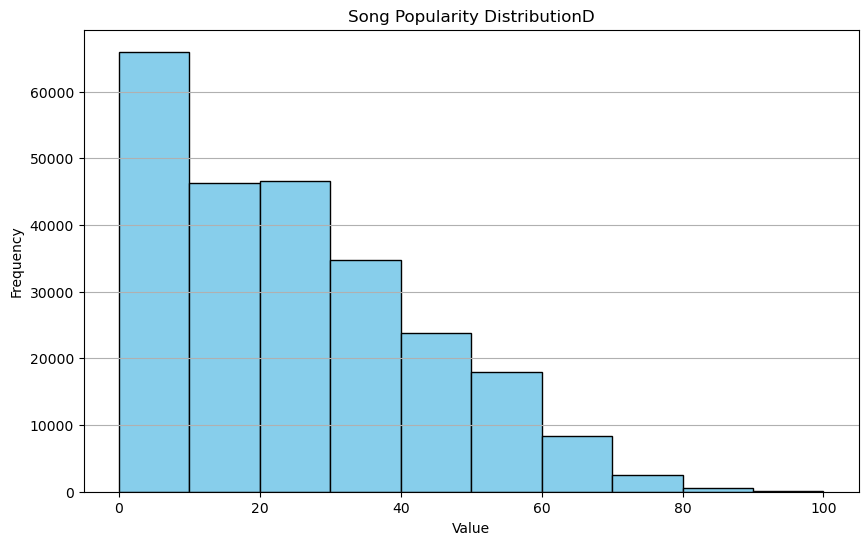

In [130]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['popularity'], bins=10, range=(0, 100), color='skyblue', edgecolor='black')
plt.title('Song Popularity DistributionD')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

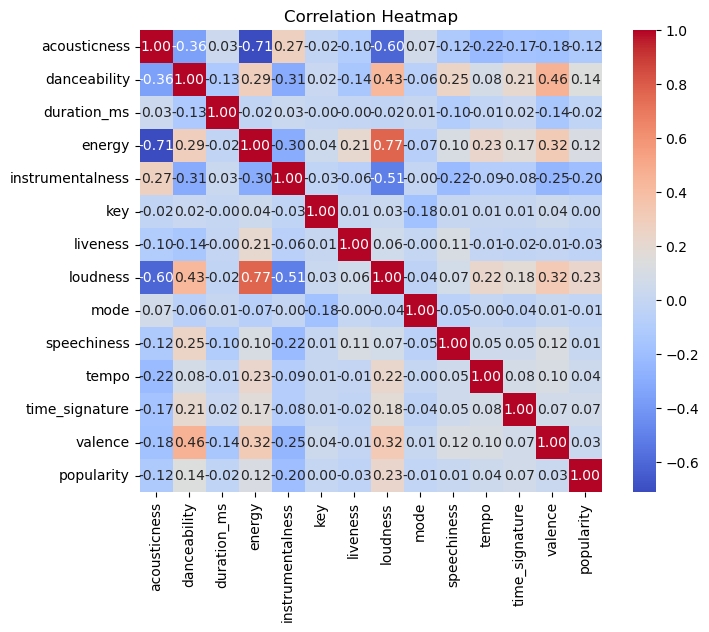

In [131]:
matrix = df_cleaned.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

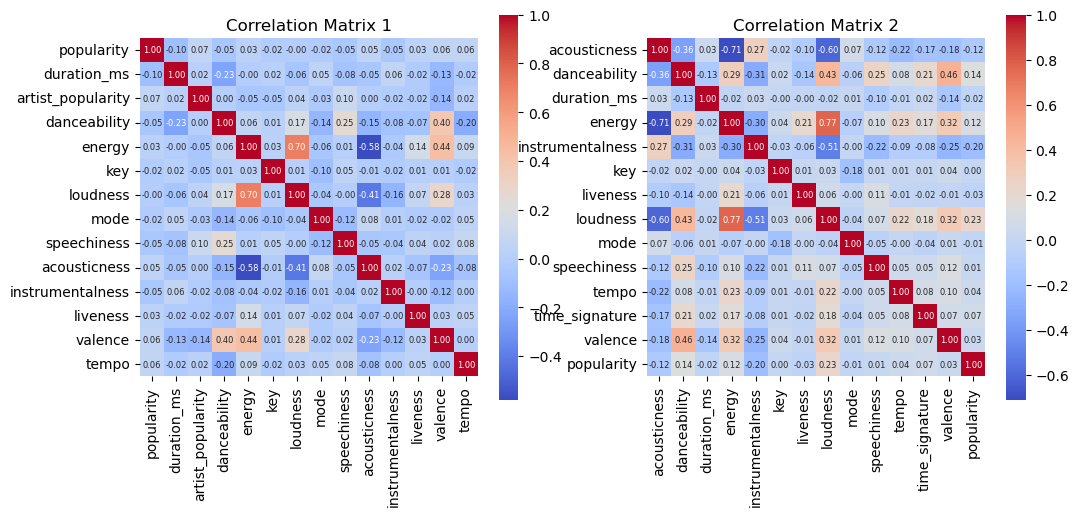

In [132]:
df_cleaned_matrix = df_cleaned.corr()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))


sns.heatmap(reduced_pop_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[0], square=True, annot_kws={"size": 6})
axes[0].set_title('Correlation Matrix 1')

# Create the second heatmap
sns.heatmap(df_cleaned_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[1], square=True, annot_kws={"size": 6})
axes[1].set_title('Correlation Matrix 2')

# Adjust layout and show the plot

plt.show()